# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the info() of the df **

** Check the head of df **

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [7]:
df.title.nunique()

110

In [8]:
df.title.unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [23]:
df.loc[:, 'Reasons'] = df.title.apply(lambda x: x.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [24]:
df['Reasons'].value_counts().head(5)

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

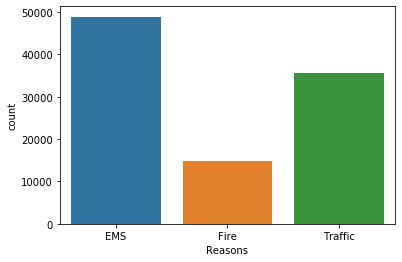

In [25]:
sns.countplot(x='Reasons',data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [12]:
type(df.timeStamp.iloc[0])

str

In [13]:
df.timeStamp.dtype

dtype('O')

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [14]:
df.timeStamp = pd.to_datetime(df.timeStamp)

In [15]:
df.timeStamp.dt.hour

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: timeStamp, Length: 99492, dtype: int64

In [16]:
time = df['timeStamp'].iloc[0]
time.hour

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [17]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reasons/Departments'],
      dtype='object')

In [37]:
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['Day'] = df['timeStamp'].dt.dayofweek

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [38]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(dmap)

In [39]:
df['Day']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day, Length: 99492, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

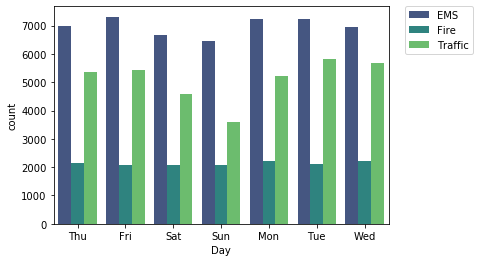

In [40]:
sns.countplot(x="Day", hue="Reasons",data=df, palette="viridis")
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

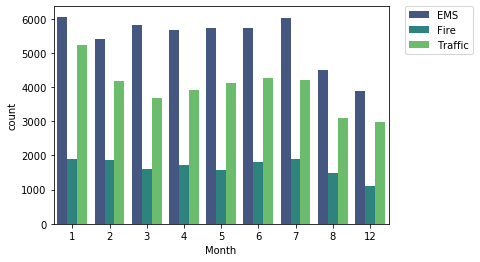

In [32]:
sns.countplot(x="Month", hue="Reasons",data=df, palette="viridis")
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [41]:
byMonth = df.groupby('Month').count()

In [52]:
byMonth = byMonth.reset_index()

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

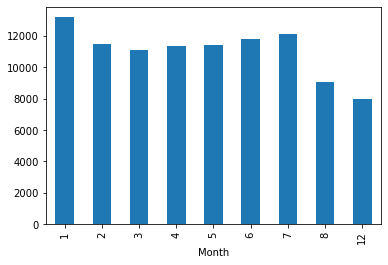

In [49]:
byMonth['Reasons'].plot.bar()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

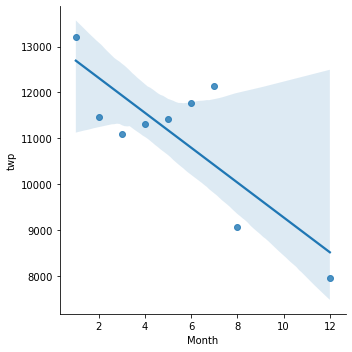

In [54]:
sns.lmplot(x='Month',y='twp',data=byMonth)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [57]:
df['Date'] = df['timeStamp'].dt.date

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [58]:
Dategroup = df.groupby('Date').count()

In [59]:
Dategroup.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day,Reasons
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

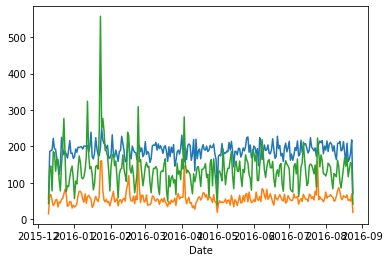

In [67]:
for reason in df.Reasons.unique():
    df[df.Reasons==reason].groupby('Date')['twp'].count().plot()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [93]:
df.sort_values('Date')

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons/Departments,Hour,Month,Day,Reasons,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,EMS,2015-12-10
84,40.230455,-75.633981,WORTH BLVD & TYSON ST; CHESTER COUNTY; Statio...,19465.0,EMS: MEDICAL ALERT ALARM,2015-12-10 20:52:02,CHESTER COUNTY,WORTH BLVD & TYSON ST,1,EMS,20,12,Thu,EMS,2015-12-10
83,40.007435,-75.248989,MEADOW LN & MONTGOMERY AVE; LOWER MERION; 2015...,19066.0,Fire: CARBON MONOXIDE DETECTOR,2015-12-10 20:47:01,LOWER MERION,MEADOW LN & MONTGOMERY AVE,1,Fire,20,12,Thu,Fire,2015-12-10
82,40.290693,-75.576661,SWAMP PIKE & ROMIG RD; NEW HANOVER; Station 3...,19525.0,EMS: SYNCOPAL EPISODE,2015-12-10 20:47:01,NEW HANOVER,SWAMP PIKE & ROMIG RD,1,EMS,20,12,Thu,EMS,2015-12-10
81,40.003955,-75.220701,BELMONT AVE & E CITY AVE; LOWER MERION; 2015-1...,19004.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 20:41:02,LOWER MERION,BELMONT AVE & E CITY AVE,1,Traffic,20,12,Thu,Traffic,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99395,40.244636,-75.642182,HIGH ST & S WASHINGTON ST; POTTSTOWN; 2016-08-...,19464.0,Fire: FIRE SPECIAL SERVICE,2016-08-24 04:11:01,POTTSTOWN,HIGH ST & S WASHINGTON ST,1,Fire,4,8,Wed,Fire,2016-08-24
99394,40.244636,-75.642182,HIGH ST & S WASHINGTON ST; POTTSTOWN; Station...,19464.0,EMS: HEAD INJURY,2016-08-24 04:11:01,POTTSTOWN,HIGH ST & S WASHINGTON ST,1,EMS,4,8,Wed,EMS,2016-08-24
99393,40.239702,-75.350219,CONTINENTAL DR & REVERE DR; TOWAMENCIN; Stati...,19438.0,EMS: SEIZURES,2016-08-24 04:07:01,TOWAMENCIN,CONTINENTAL DR & REVERE DR,1,EMS,4,8,Wed,EMS,2016-08-24
99407,40.140524,-75.166460,SUSQUEHANNA RD & S LIMEKILN PIKE; UPPER DUBLIN...,19034.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 05:32:02,UPPER DUBLIN,SUSQUEHANNA RD & S LIMEKILN PIKE,1,Traffic,5,8,Wed,Traffic,2016-08-24


In [84]:
unstack_day = df.groupby(['Day', 'Hour'])['Reasons'].count().unstack()
unstack_day

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

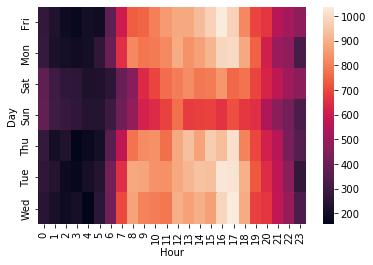

In [85]:
sns.heatmap(unstack_day)

** Now create a clustermap using this DataFrame. **

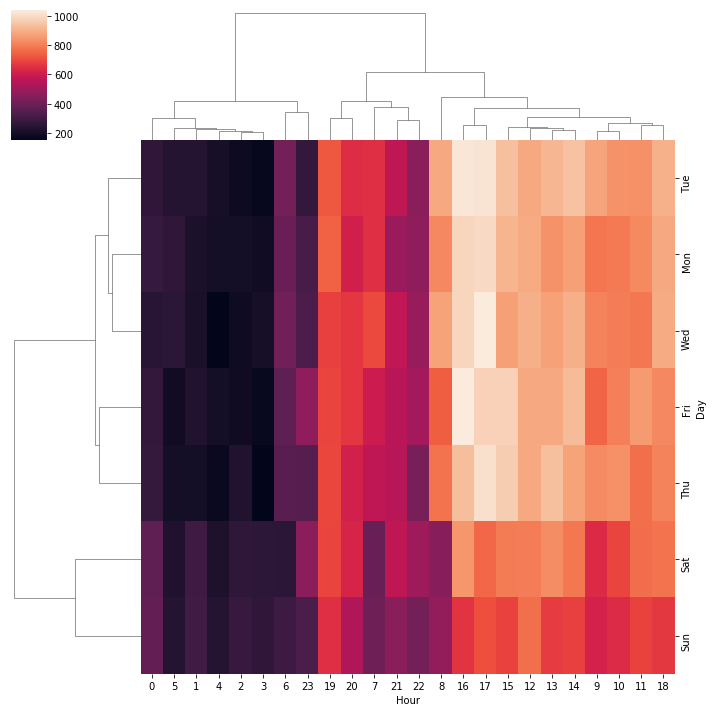

In [86]:
sns.clustermap(unstack)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [90]:
unstack_month = df.groupby(['Day', 'Month'])['Reasons'].count().unstack()
unstack_month

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


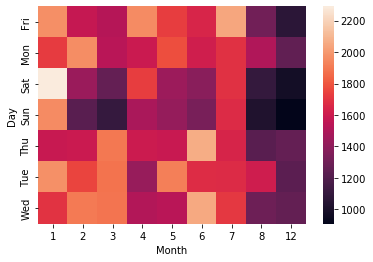

In [91]:
sns.heatmap(unstack_month)

** Now create a clustermap using this DataFrame. **

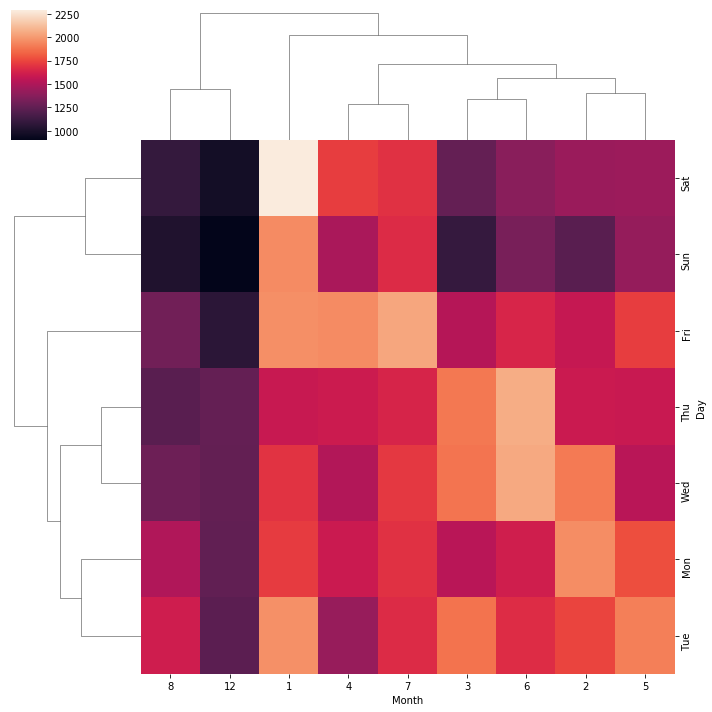

In [92]:
sns.clustermap(unstack_month)

**Continue exploring the Data however you see fit!**
# Great Job!